In [115]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
import re

Findings:

All seasons have the same 34 columns.

Seasons 2000-01 - 2003-04 had 82 games each for 29 teams: 82*29*0.5 = 1189 games played
Seasons 2004-05 - 2010-11 had 82 games each for 30 teams: 82*30*0.5 = 1230 games played
Season 2011-12 had 66 games each for 30 teams: 66*30*0.5 = 990 games played
Season 2012-13 had 82 games each for 30 teams: 82*30*0.5 - 1 = 1229 (One game cancelled due to Boston Marathon bombing)
Seasons 2013-14 - 2018-19 had 82 games each for 30 teams: 82*30*0.5 = 1230 games played

Columns:
NEUTRALDESCRIPTION never contains information


In [75]:
seasons = data_loader.load_data()

In [98]:
per_season_stats = {}
per_season_stats['games_played'] = seasons.groupby("season_name")['GAME_ID'].nunique()
per_season_stats['nr_teams'] = seasons.groupby("season_name")['PLAYER1_TEAM_ABBREVIATION'].nunique()
per_season_stats['games_per_team'] = round(per_season_stats['games_played'] / per_season_stats['nr_teams'] * 2).astype(int)
per_season_stats["nr_of_eventtype"] = seasons.groupby("season_name")['EVENTMSGTYPE'].nunique()
#Per game and team:
per_season_stats['mean_nr_plays_per_game'] = seasons.groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats["points_scored_per_game"] = seasons.groupby(["season_name","GAME_ID"])["SCORE"].last().apply(lambda score: sum([int(i) for i in score.split() if i.isdigit()])).groupby(level = "season_name").mean() / 2 
per_season_stats["field_goals_made_per_game"] = seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE"].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats["field_goals_attempted_per_game"] = per_season_stats["field_goals_made_per_game"] + seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MISSED"].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats["field_goal_percent"] = per_season_stats["field_goals_made_per_game"] / per_season_stats["field_goals_attempted_per_game"]
per_season_stats["nr_of_field_goal_types"] = seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE"].groupby("season_name")['EVENTMSGACTIONTYPE'].nunique()
per_season_stats["fouls_per_game"] = seasons[seasons["EVENTMSGTYPE"]=="FOUL"].groupby(["season_name","GAME_ID"])['EVENTNUM'].count().groupby(level = "season_name").mean() / 2
per_season_stats = pd.DataFrame(per_season_stats)
per_season_stats

,games_played,nr_teams,games_per_team,nr_of_eventtype,mean_nr_plays_per_game,points_scored_per_game,field_goals_made_per_game,field_goals_attempted_per_game,field_goal_percent,nr_of_field_goal_types,fouls_per_game
season_name,,,,,,,,,,,
2000-01,1189,29,82,13,225.886039,94.569807,35.687553,80.598823,0.442780,30,23.185029
2001-02,1189,29,82,13,222.972246,95.476451,36.169470,81.271236,0.445046,32,22.126577
2002-03,1189,29,82,13,224.284272,94.917578,35.717830,80.785955,0.442129,32,22.640454
2003-04,1189,29,82,14,223.267031,93.397813,35.010513,79.816232,0.438639,34,22.197645
2004-05,1230,30,82,14,227.266667,97.198780,35.949187,80.335772,0.447487,34,23.402033
2005-06,1230,30,82,14,225.252033,97.008537,35.839837,78.989431,0.453730,34,23.550813
2006-07,1230,30,82,14,226.295935,98.739431,36.528455,79.704065,0.458301,34,23.123171
2007-08,1230,30,82,14,224.024797,99.923171,37.263821,81.504472,0.457200,55,21.736992
2008-09,1230,30,82,14,222.135366,99.950813,37.117886,80.916260,0.458720,54,21.780081


<AxesSubplot:xlabel='season_name'>

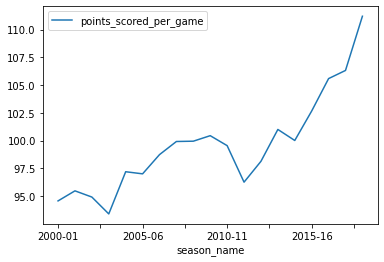

In [99]:
per_season_stats[["points_scored_per_game"]].plot()

PERIOD
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PERIOD, dtype: object

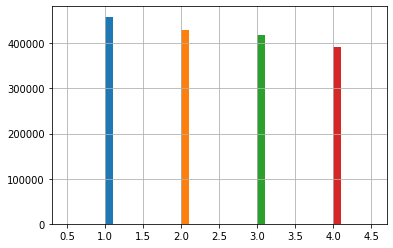

In [103]:
seasons[(seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE") & (seasons["PERIOD"] < 5)].groupby("PERIOD")["PERIOD"].hist()

In [132]:
p = re.compile('(\s{2}|\' )([\w+ ]*)')
seasons[seasons["EVENTMSGTYPE"]=="FIELD_GOAL_MADE"][["EVENTMSGACTIONTYPE","HOMEDESCRIPTION","VISITORDESCRIPTION"]].apply(lambda play: p.match(str(play["HOMEDESCRIPTION"])) if play["HOMEDESCRIPTION"] else p.match(str(play["VISITORDESCRIPTION"])), axis=1)

error: missing ), unterminated subpattern at position 4

In [158]:
def resolve_description(description):
    player = re.compile("([^\s]+)")
    player = player.search(description)
    print(description[player.end(0)+1:])
    print(player.group(0))
    

resolve_description("Mason 17' Jump Shot (2 PTS)")

17' Jump Shot (2 PTS)
Mason
